# FIGURE 1. CELL VIABILITY AND SIGNALING OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing, MeanCenter, Log2T, MergeDfbyMean
from msresist.sequence_analysis import FormatName, pYmotifs
from msresist.figures.figure1 import plotClustergram, plotpca_explained, plotpca_ScoresLoadings_plotly, plotVarReplicates, selectpeptides, FC_timecourse, barplot_UtErlAF154, barplotFC_TvsUT  
import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## CELL VIABILITY

## Cell Survival

In [3]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv").dropna()
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR2_Phase.csv')
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv').iloc[:, :31]
lines = ["PC9", "KO", "KI", "KD", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

In [4]:
itp = 24
ftp = 120

### Time Course

In [5]:
t1 = ["UT", "A/E", "-E"]
t2 = ["Untreated", "Erl + AF154", "Erlotinib"]
ylabel = "fold-change to t=" + str(itp) + "h"

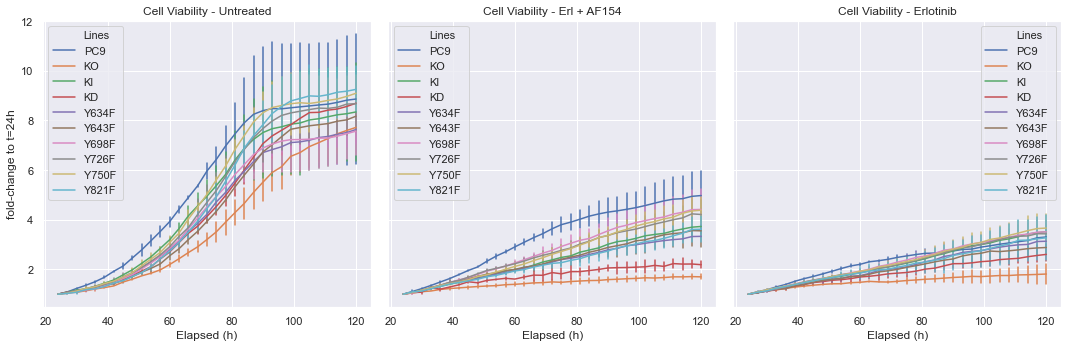

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i in range(len(t1)):
    title = "Cell Viability - " + t2[i]
    FC_timecourse(ax[i], r2, itp, ftp, lines, t1[i], title, ylabel, r2=r3, FC=True)

plt.tight_layout()

### At specified endpoint

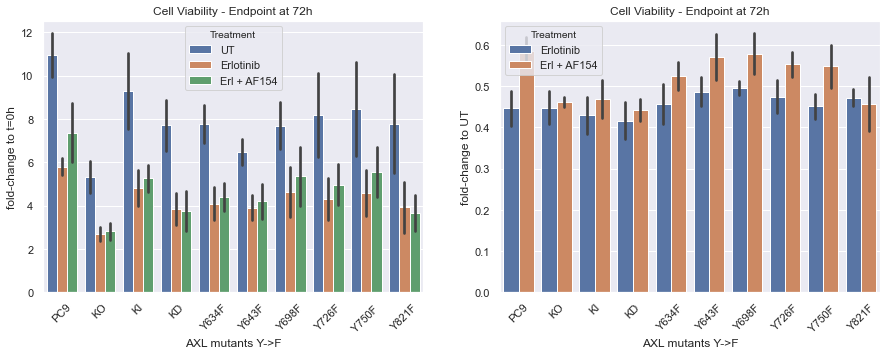

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ftp = 72
itp = 0
barplot_UtErlAF154(ax[0], lines, r1, itp, ftp, r2=r2, r3=r3, FC=True)
barplotFC_TvsUT(ax[1], r1, itp, ftp, lines, r2=r2, r3=r3, FC=False)

## Cell Death

### Time Course

In [8]:
red2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR2_RedCounts.csv")
red3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR3_RedCounts.csv")

In [9]:
ftp = 120
ylabel = "YOYO+ cell count (" + str(ftp) + "h)"

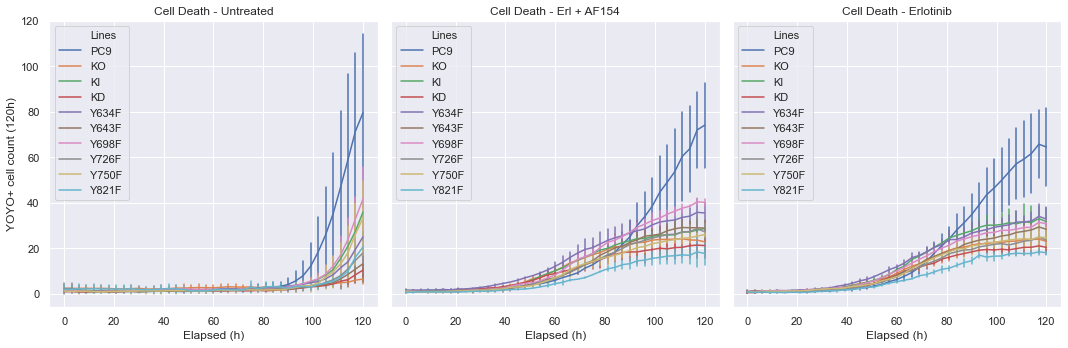

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i in range(len(t1)):
    title = "Cell Death - " + t2[i]
    FC_timecourse(ax[i], red2, itp, ftp, lines, t1[i], title, ylabel, r2=red3, FC=False)

plt.tight_layout()

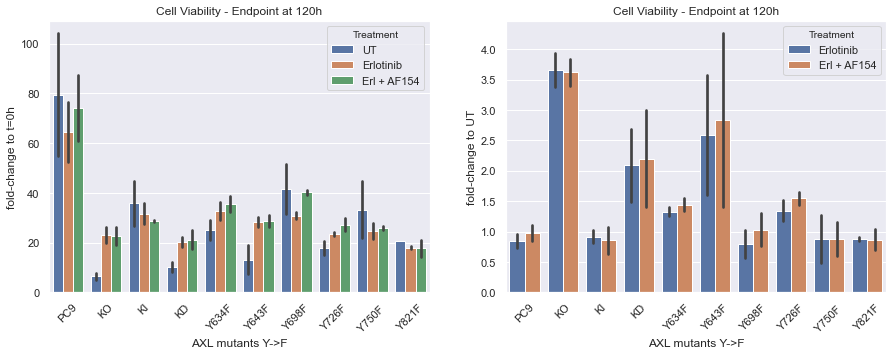

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ftp = 120
itp = 0
barplot_UtErlAF154(ax[0], lines, red2, itp, ftp, r2=red3, FC=False)
barplotFC_TvsUT(ax[1], red2, itp, ftp, lines, r2=red3, FC=False)

## SIGNALING

#### Erlotinib + AF154

In [12]:
A = preprocessing(Axlmuts_ErlF154=True, motifs=True, Vfilter=False, FCfilter=False, log2T=True, mc_row=True, mc_col=False)
A.columns = list(A.columns[:5]) + ["PC9", "Knock-Out", "Kinase Dead", "Knock-In", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F", "Y821F"]

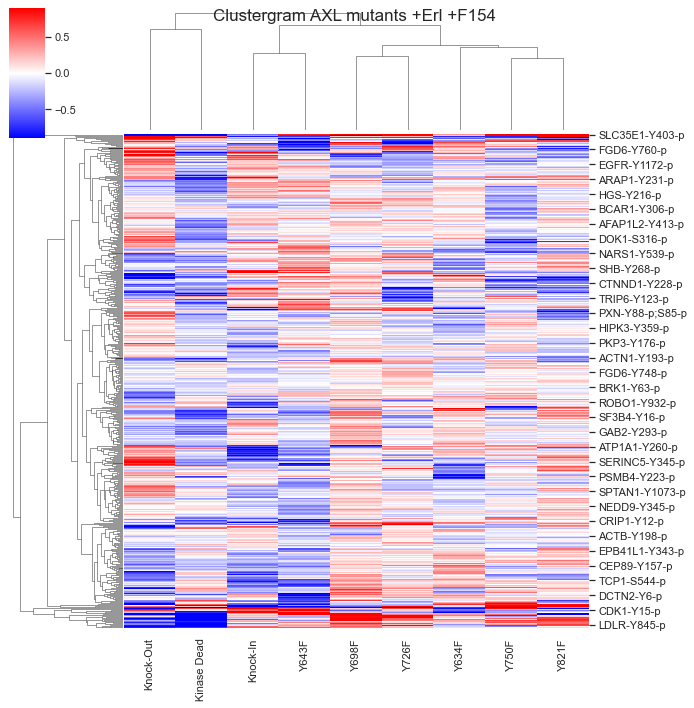

In [13]:
dA = pd.concat([A.iloc[:, 3:5], A.iloc[:, 6:]], axis=1).set_index(["Abbv", "Position"])
plotClustergram(dA, "Clustergram AXL mutants +Erl +F154",  max(np.max(np.abs(dA)) * 0.3))

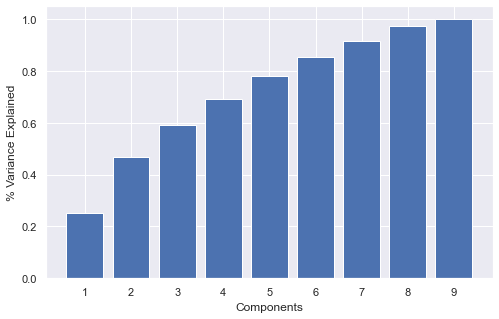

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, dA, dA.shape[1])

               PC1       PC2
Position                    
S988-p    0.048381  0.052263
Y1234-p  -0.037086  0.009200
Y1003-p   0.033639  0.053240


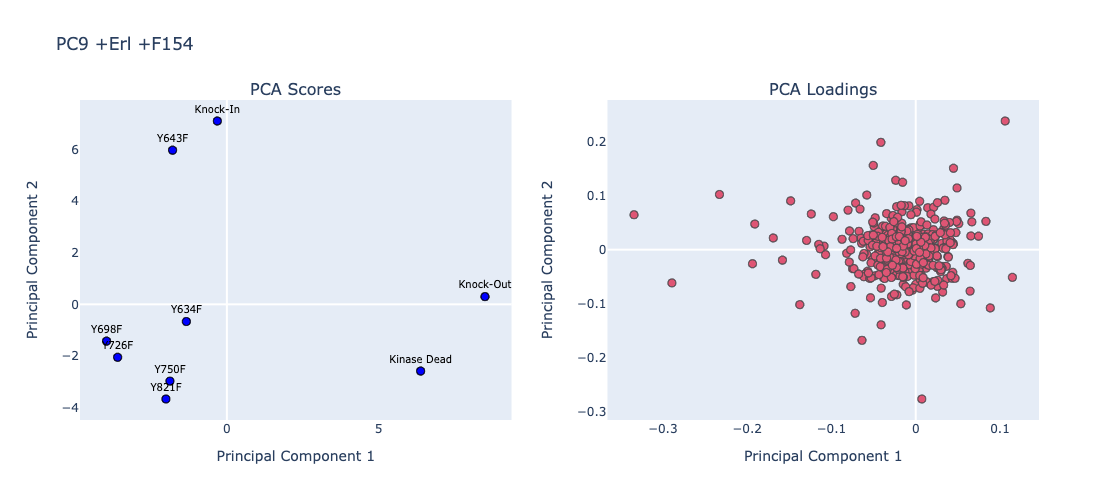

In [15]:
plotpca_ScoresLoadings_plotly(dA.T, "PC9 +Erl +F154", "MET")

In [16]:
B = preprocessing(Axlmuts_Erl=True, motifs=True, log2T=True, mc_row=True)
B.columns = A.columns
print(B.columns)
# B = B.drop(["Y634F", "Y750F"], axis=1)

Index(['Protein', 'Sequence', 'UniprotAcc', 'Abbv', 'Position', 'PC9',
       'Knock-Out', 'Kinase Dead', 'Knock-In', 'Y634F', 'Y643F', 'Y698F',
       'Y726F', 'Y750F', 'Y821F'],
      dtype='object')


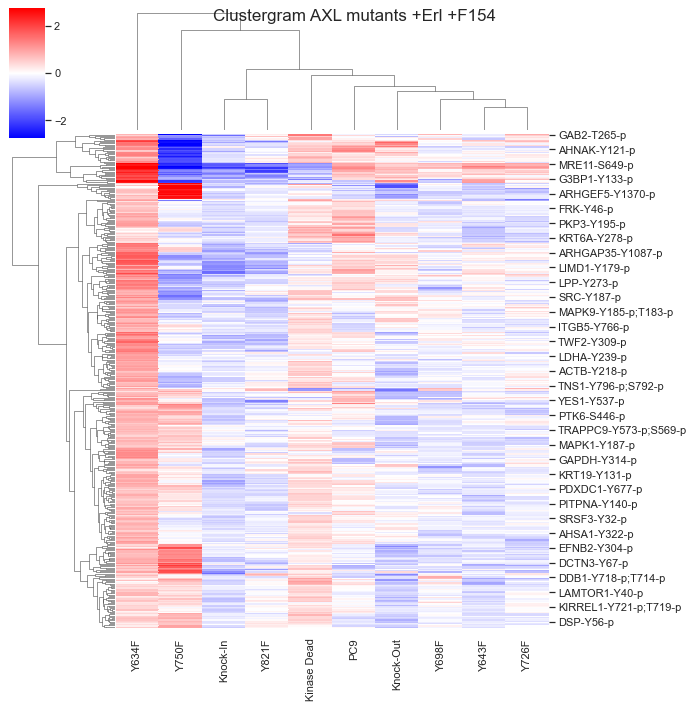

In [17]:
dB = B.set_index(["Abbv", "Position"]).iloc[:, 3:]
plotClustergram(dB, "Clustergram AXL mutants +Erl +F154",  max(np.max(np.abs(dB)) * 0.6))

               PC1       PC2
Position                    
Y1365-p   0.038894  0.059249
Y1003-p   0.029707  0.027748


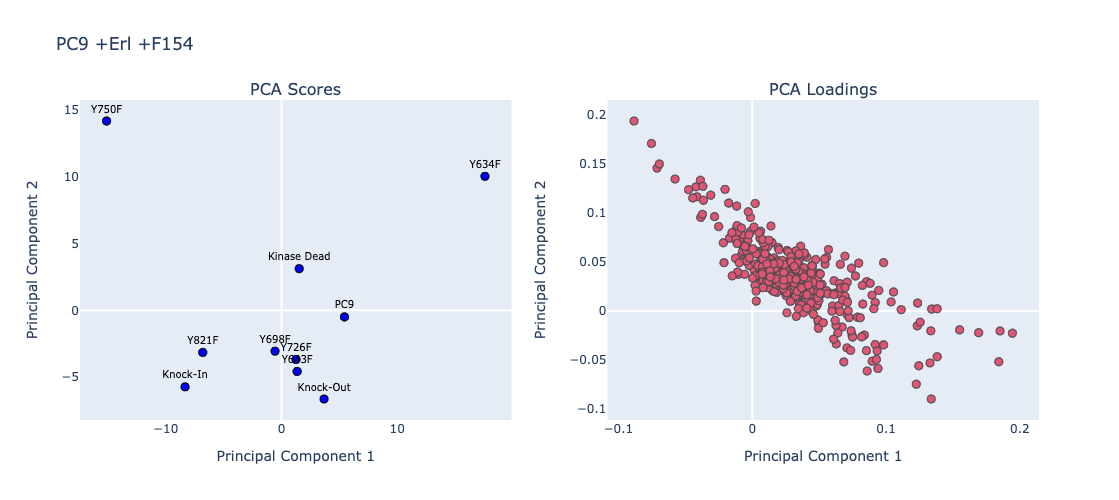

In [18]:
plotpca_ScoresLoadings_plotly(dB.T, "PC9 +Erl +F154", "MET")

## Selecting and Clustering a subset of kinases of interest

In [19]:
koi = {
    "EGFR":"Y1197-p", "MET":"Y1003-p", "ERBB2":"Y877-p", "ERBB3":"Y1328-p", "EPHB3":"Y792-p", "GAB1":"Y627-p", "GAB2":"T265-p", "CRK":"Y251-p", 
    "CRKL":"Y251-p", "SHC1":"S426-p", "MAPK3":"Y204-p;T202-p", "MAPK3":"T207-p", "MAPK1":"Y187-p;T185-p", "MAPK7":"Y221-p","MAPK9":"Y185-p", "MAPK10":"Y223-p",
    "MAPK12":"Y185-p", "MAPK13":"Y182-p", "MAPK14":"Y182-p", "HIPK1":"T351-p", "HIPK3":"T354-p;T358-p", "BCAR3":"Y266-p", "FRK":"Y46-p", "DCBLD2":"Y750-p",
    "SRCIN1":"Y396-p", "BRK1":"Y63-p", "STAT3":"Y686-p", "YES1":"Y446-p", "YES1":"Y222-p", "LYN":"Y397-p", "LYN":"Y508-p", "SRC":"Y187-p"
    }

In [20]:
A = A.copy().set_index(["Abbv", "Position"])
B = B.copy().set_index(["Abbv", "Position"])

In [21]:
Ams = selectpeptides(A.drop("PC9", axis=1), koi)
Aredd = Ams.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

Bms = selectpeptides(B, koi)
Bredd = Bms.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

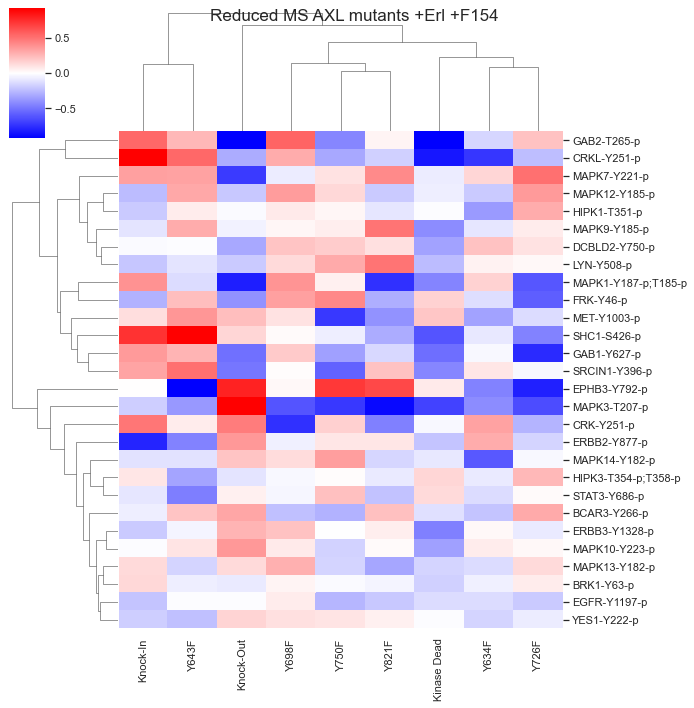

In [22]:
plotClustergram(Aredd, "Reduced MS AXL mutants +Erl +F154", max(np.max(np.abs(dB)) * 0.2))

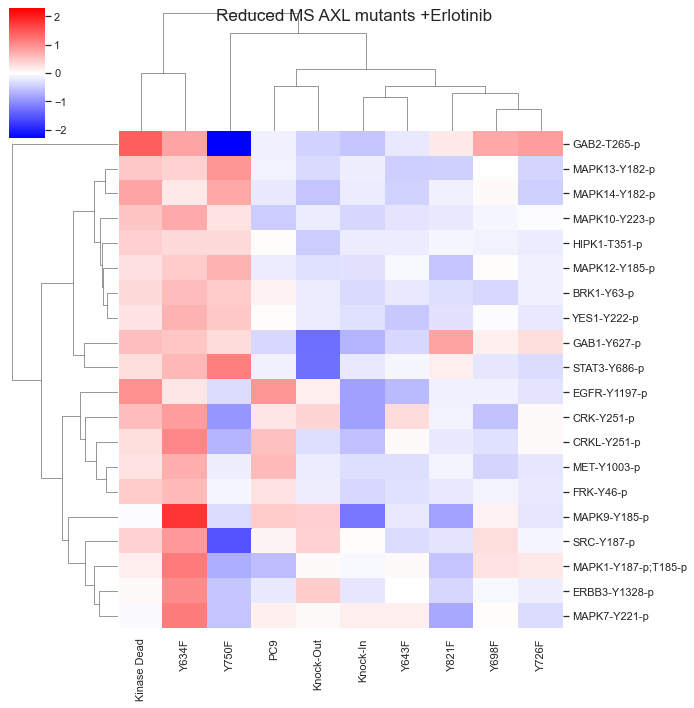

In [23]:
plotClustergram(Bredd, "Reduced MS AXL mutants +Erlotinib", max(np.max(np.abs(dB)) * 0.5))

### Comparing Overlapping peptides across AXL mutant vs Bypass-treated PC9 Cells

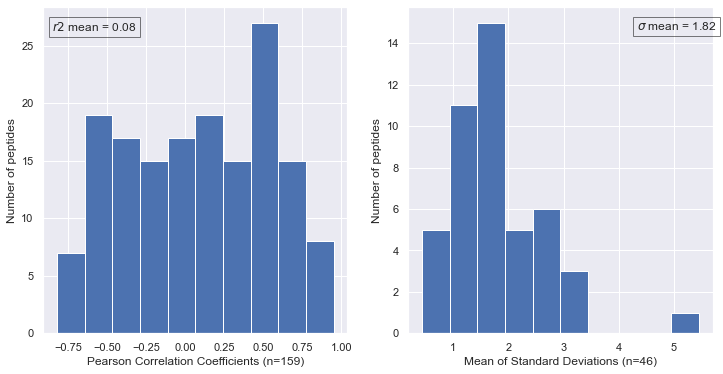

In [24]:
x = preprocessing(Axlmuts_ErlF154=True, rawdata=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
plotVarReplicates(ax, x)

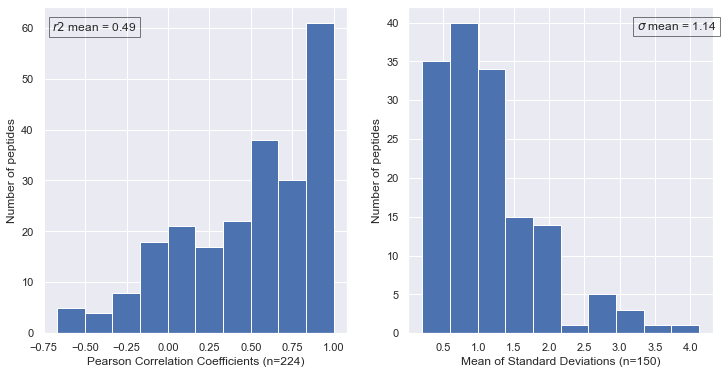

In [25]:
x = preprocessing(AXLwt=True, rawdata=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
plotVarReplicates(ax, x)

### Compare specific peptides in both replicates

In [26]:
import matplotlib.cm as cm
from msresist.figures.figure1 import plot_AllSites

In [27]:
def MSaxl(file):
    b = MeanCenter(Log2T(file), mc_row=True, mc_col=False)
    longnames, shortnames = FormatName(b)
    b["Protein"] = longnames
    b = b.assign(Abbv=shortnames)
    merging_indices = list(b.columns[:3]) + ["Abbv"]
    b = pYmotifs(b, longnames)
    return b

In [28]:
b1 = pd.read_csv("./msresist/data/Raw/PC9_mutants_ActivatingAb_BR1_raw.csv")
lines = ["PC9", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F", "Y821F"]
b1.columns = list(b1.columns[:3]) + lines

b1 = MSaxl(b1).set_index(["Abbv", "Position"])

In [29]:
b2 = pd.read_csv("./msresist/data/Raw/PC9_mutants_ActivatingAb_BR2_raw.csv")
b2.columns = list(b2.columns[:3]) + lines

b2 = MSaxl(b2).set_index(["Abbv", "Position"])

In [30]:
b1.iloc[:, 5:] = b1.iloc[:, 5:].div(b1.iloc[:, 5], axis=0)
b2.iloc[:, 5:] = b2.iloc[:, 5:].div(b2.iloc[:, 5], axis=0)

In [31]:
b1 = b1.reset_index()
b2 = b2.reset_index()

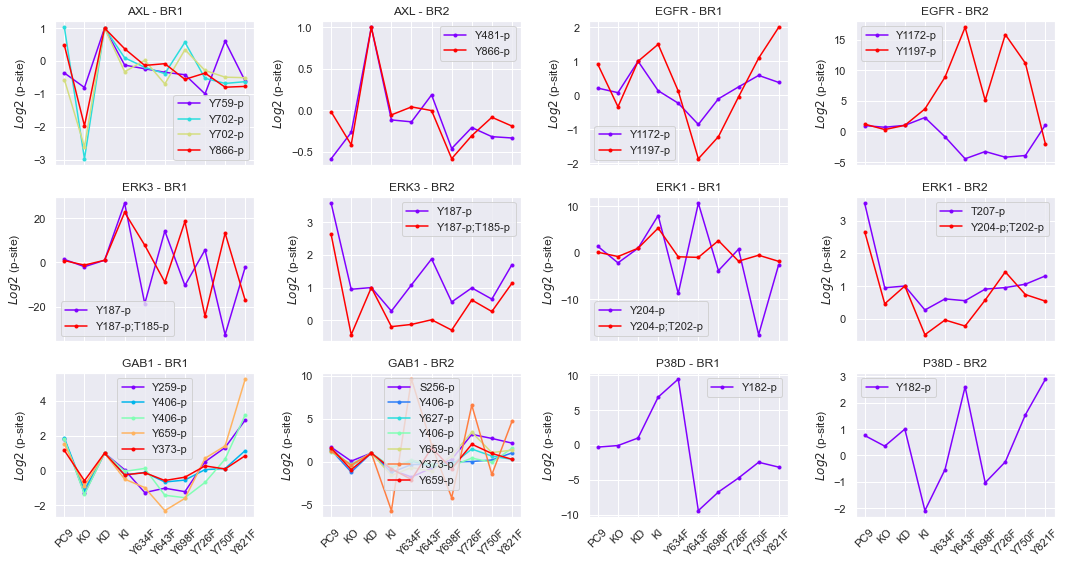

In [32]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 8), sharey=False, sharex=True)
plot_AllSites(ax[0, 0], b1.copy(), "AXL", "AXL - BR1")
plot_AllSites(ax[0, 1], b2.copy(), "AXL", "AXL - BR2")
plot_AllSites(ax[0, 2], b1.copy(), "EGFR", "EGFR - BR1")
plot_AllSites(ax[0, 3], b2.copy(), "EGFR", "EGFR - BR2")
plot_AllSites(ax[1, 0], b1.copy(), "MAPK1", "ERK3 - BR1")
plot_AllSites(ax[1, 1], b2.copy(), "MAPK1", "ERK3 - BR2")
plot_AllSites(ax[1, 2], b1.copy(), "MAPK3", "ERK1 - BR1")
plot_AllSites(ax[1, 3], b2.copy(), "MAPK3", "ERK1 - BR2")
plot_AllSites(ax[2, 0], b1.copy(), "GAB1", "GAB1 - BR1")
plot_AllSites(ax[2, 1], b2.copy(), "GAB1", "GAB1 - BR2")
plot_AllSites(ax[2, 2], b1.copy(), "MAPK13", "P38D - BR1")
plot_AllSites(ax[2, 3], b2.copy(), "MAPK13", "P38D - BR2")

plt.tight_layout()